<center><h1>ASSIGNMENT 1</h1></center><break><center><h2>VISUALIZATION</h2></center><break><center><h2>HANI NAFISAH AMALIYA</h2></center><break><center><h3>KELAS PYTN-10</h3></center>

<p>Berikut ini merupakan Assignment 1 mengenai Visualization. Macam visualisasi data yang akan dibahas pada Assignment 1 ini, antara lain : </p><break>

<ol>
    <li>Area Plot</li>
    <li>Histogram</li>
    <li>Bar Chart</li>
    <li>Pie Chart</li>
    <li>Box Plot</li>
    <li>Scatter Plot</li>
    <li>Line Plot</li>
    <li>Word Clouds</li>
</ol>

In [1]:
# Import Library
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image as img
from wordcloud import WordCloud, STOPWORDS
from scipy import stats

In [2]:
# Membaca File
df_lon = pd.read_csv("london_crime_by_lsoa.csv", dtype={'year':str, 'month':str})

In [3]:
df_lon.shape

(13490604, 7)

In [4]:
# Menampilkan Semua Kolom

pd.set_option("display.max.columns", None)

df_lon.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [5]:
# Menampilkan Info Setiap Kolom
df_lon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            object
 6   month           object
dtypes: int64(1), object(6)
memory usage: 720.5+ MB


In [6]:
# Transpose Data

df_lon.describe(include= 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01001043,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Other Theft,522180
year,13490604,9,2008,1498956
month,13490604,12,4,1124217


In [7]:
df_lon['year'].unique()

array(['2016', '2015', '2008', '2012', '2010', '2013', '2014', '2011',
       '2009'], dtype=object)

In [8]:
total_num = df_lon.describe(include=np.number)

total_num

,value
count,1.349060e+07
mean,4.779444e-01
std,1.771513e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+00
max,3.090000e+02


In [9]:
print('MIN: {}, MAX: {}, UNIQUE_VALUES: {}, MODE: {}'.
      format(int(total_num['value']['min']),
             int(total_num['value']['max']),
             df_lon['value'].unique().shape[0],
             stats.mode(df_lon['value'])[0][0]))

MIN: 0, MAX: 309, UNIQUE_VALUES: 247, MODE: 0


In [10]:
#styling
mpl.style.use(['ggplot'])

## 1. Area Plot
<p>Dikenal juga sebagai Stacked Line Plot. Area plots ter-stacked secara default, untuk menghasilkan stacked area plot, setiap kolom harus berupa nilai positif semua atau nilai negatif semua (nilsi NaN akan ditetapkan secara default ke 0). Kemudian untuk menghasilkan unstacked plot, berikan stacked = False. </p>
<p><b>Pertanyaan :</b> Berapa jumlah kriminalitas pada kategori Minor dengan jumlah 5 terbanyak?</p>

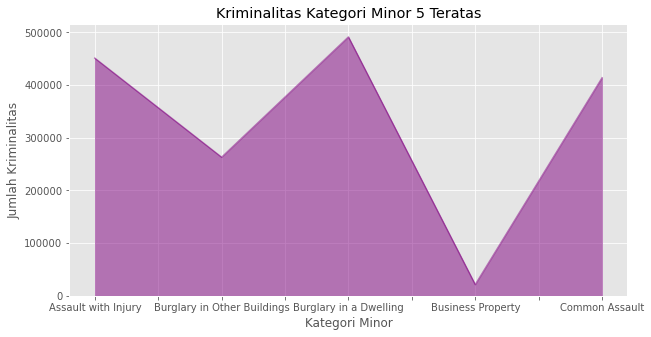

In [13]:
df_minor_category = df_lon.groupby('minor_category', axis=0).sum()
teratas = df_minor_category.head()

teratas['value'].plot(kind = 'area',
             stacked = False,
             color = 'purple',
             figsize=(10,5)); #agar grafik tidak menutupi tulisan

#menambahkan judul
plt.title('Kriminalitas Kategori Minor 5 Teratas');

#menambahkan keterangan di sumbu-y
plt.ylabel('Jumlah Kriminalitas');

#menambahkan keterangan di sumbu-x
plt.xlabel('Kategori Minor');

Dari Area Plot di atas, dapat dilihat bahwa jumlah kriminalitas 5 terbanyak pada Kategori Minor, antara lain : Assault with Injury, Burglary in Other Buildings, Burglary in a Dwelling Kategori Minor, Business Property, dan Common Assault   

## 2. Histogram
<p>Histogram adalah cara untuk merepresentasikan distribusi frekuensi dari dataset numerik. Cara kerjanya adalah mempartisi sumbu-x menjadi beberapa bin, menetapkan setiap titik data dalam kumpulan data kita ke sebuah bin, kemudian menghitung jumlah titik data yang telah ditetapkan ke setiap bin. Jadi sumbu-y adalah frekuensi atau banyaknya titik data pada setiap bin.</p>
<p><b>Pertanyaan :</b> Bagaimana sebaran kriminalitas pada kategori Minor?</p>

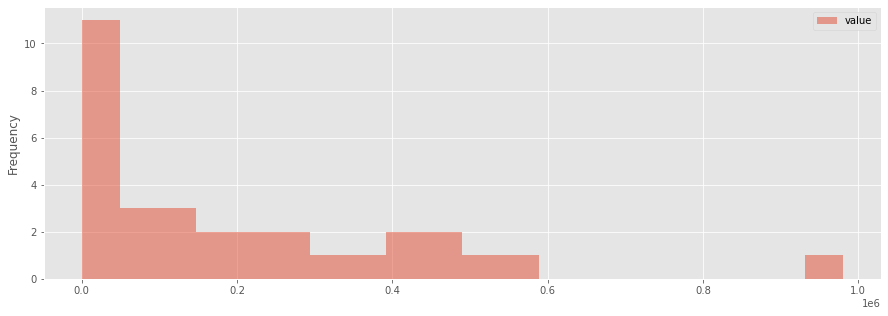

In [37]:
minor = df_minor_category

count, bin_edges = np.histogram(minor, bins=10)

minor.plot(kind = 'hist',
             alpha=0.5, #transparansi
             bins=20,
             figsize=(15,5));

Dari Histogram di atas, dapat diketahui bahwa sebaran kriminalitas Kategori Minor berbeda tingginya sesuai dengan jumlah kriminalitas masing-masing di Kategori Minor.

## 3. Bar Chart
<p>Plot Batang atau Bar Plot adalah cara merepresentasikan data dimana panjang batang merepresentasikan besaran / ukuran fitur / variabel. Grafik batang biasanya mewakili variabel numerik dan kategori yang dikelompokkan dalam interval.</p>
<p><b>Pertanyaan :</b> Jumlah kejahatan pada kategori Minor di kota London dari tahun 2008 hingga 2016</p>

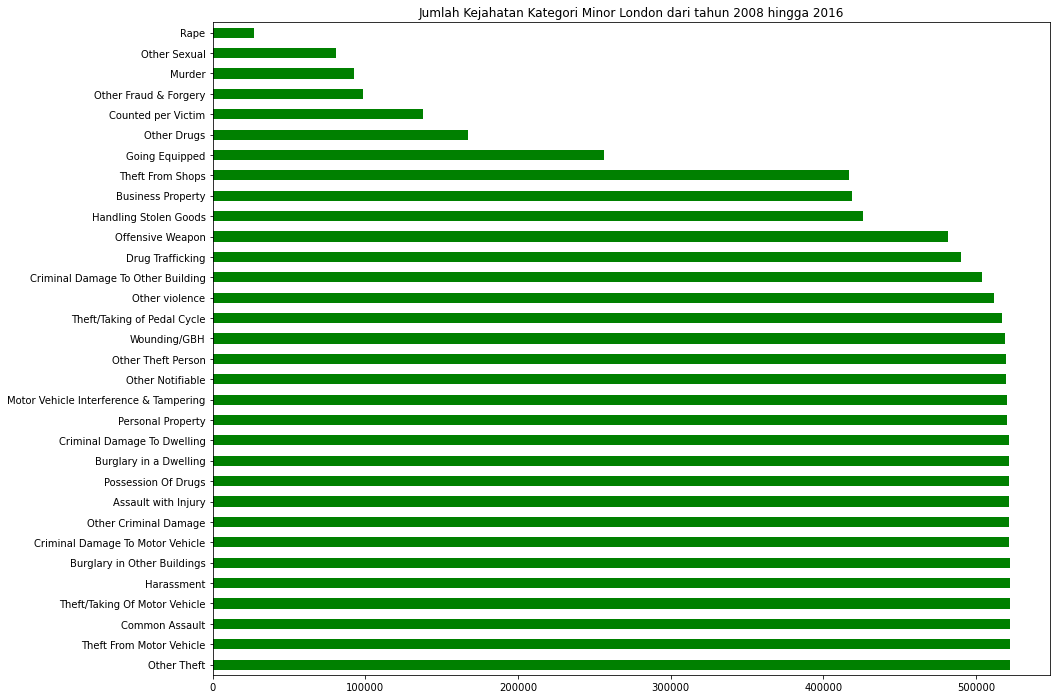

In [12]:
minor_ctg= df_lon.minor_category.value_counts(ascending=False)



minor_ctg.plot.barh(figsize = (15, 12),
                    color = 'green',
                    title = "Jumlah Kejahatan Kategori Minor London dari tahun 2008 hingga 2016");

Pada Bar Chart di atas, dapat dilihat berbagai macam kriminalitas di Kategori Minor. Kemudian menampilkan hasil bahwa pencurian kendaraan bermotor (Theft from Motor Vehicle), serangan ditempat umum (Common Assault) dan pencurian lainnya menjadi kejahatan kategori minor terbanyak dengan total kasus 522180 dan jumlah kejahatan kategori minor paling sedikit kasusnya adalah Pemerkosaan (Rape) dengan total kasus 27000 per tahun 2008 - 2016

## 4. Pie Chart
<p>Pie Chart adalah grafik circular yang menampilkan proporsi numerik dengan membagi lingkaran (atau pie) menjadi irisan proporsional. </p>
<p><b>Pertanyaan :</b> Bagaimana persentase jumlah kejahatan pada kategori Major di kota London dari tahun 2008 hingga 2016?</p>

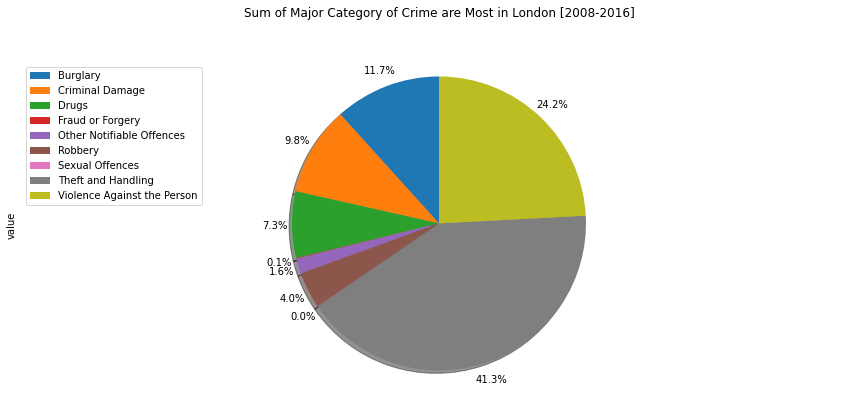

In [13]:
df_major_category= df_lon.groupby('major_category', axis=0).sum()



df_major_category['value'].plot(kind='pie',
                           figsize = (15,6),
                           autopct= '%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance= 1.12,
                            
                        )
plt.title("Sum of Major Category of Crime are Most in London [2008-2016]", y=1.12)
plt.axis('equal')
plt.legend(labels=df_major_category.index, loc='upper left')
plt.show()

Pada Pie Chart di atas, dapat disimpulkan bahwa kejahatan dengan jumlah tertinggi pada Kategori Major adalah Theft and Handling dengan persentase 41.3%, dan diikuti Violence Against the Person yang mengambil tempat kedua dengan persentase 24.2%, kemudian di posisi ketiga yaitu Burglary dengan persentase 11.7%.

## 5. Box Plot
<p>Box Plot adalah cara untuk secara statistik merepresentasikan distribusi data melalui lima dimensi utama, yaitu : </p>
<ul>
    <li>Minimum : angka terkecil di dataset</li>
    <li>Kuartil 1 : angka tengah di antara minimum dan median</li>
    <li>Kuartil 2 (Median) : angka tengah dari urutan dataset.</li>
    <li>Kuartil 3 : angka tengah di antara median dan maximum </li>
    <li>Maximum : angka terbesar di dataset</li>
</ul>
<p><b>Pertanyaan :</b> Bagaimana kah perbedaan visualisasi data seluruh kriminalitas Kategori Minor dan kriminalitas Kategori Minor 5 teratas menggunakan Box Plot?</p>

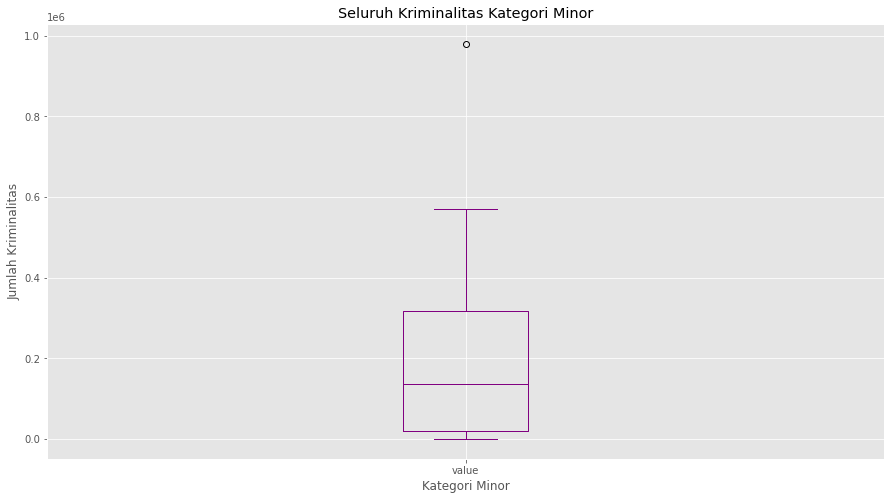

In [44]:
# Seluruh Kriminalitas Kategori Minor

df_minor_category = df_lon.groupby('minor_category', axis=0).sum()

df_minor_category['value'].plot(kind = 'box',
             stacked = False,
             color = 'purple',
             figsize=(15,8)); #agar grafik tidak menutupi tulisan

#menambahkan judul
plt.title('Seluruh Kriminalitas Kategori Minor');

#menambahkan keterangan di sumbu-y
plt.ylabel('Jumlah Kriminalitas');

#menambahkan keterangan di sumbu-x
plt.xlabel('Kategori Minor');

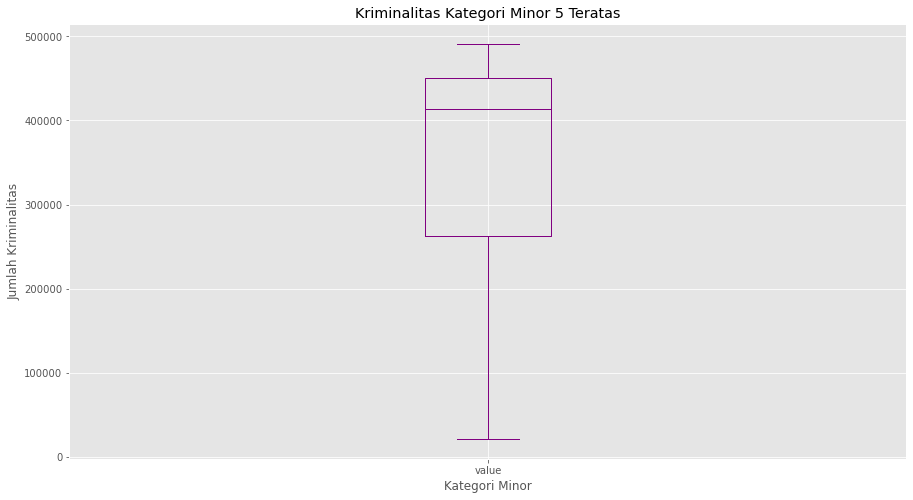

In [43]:
# Kriminalitas Kategori Minor 5 Teratas

df_minor_category = df_lon.groupby('minor_category', axis=0).sum()
teratas = df_minor_category.head()

teratas['value'].plot(kind = 'box',
             stacked = False,
             color = 'purple',
             figsize=(15,8)); #agar grafik tidak menutupi tulisan

#menambahkan judul
plt.title('Kriminalitas Kategori Minor 5 Teratas');

#menambahkan keterangan di sumbu-y
plt.ylabel('Jumlah Kriminalitas');

#menambahkan keterangan di sumbu-x
plt.xlabel('Kategori Minor');

Dari 2 visualisasi menggunakan Box Plot di atas, dapat disimpulkan bahwa data keseluruhan kriminalitas Kategori Minor dan kriminalitas Kategori Minor 5 teratas mempunyai bentuk Box Plot yang berbeda, kemudian pada Box Plot pertama yaitu keseluruhan kriminalitas Kategori Minor terdapat Outlier, sedangkan di Box Plot kedua tidak terdapat Outlier pada kriminalitas Kategori Minor 5 teratas.

## 6. Scatter Plot
<p>Scatter Plot (2D) adalah metode yang berguna untuk membandingkan variabel satu sama lain. Scatter plot terlihat mirip dengan <b>line plot</b> karena keduanya memetakan variabel independen dan dependen pada grafik 2D. Datapoints pada line plot dihubungkan dengan <b>garis</b>, sedangkan dalam scatter plot datapoints tidak terhubung.</p>
<p><b>Pertanyaan :</b> Bagaimana sebaran banyak kriminalitas setiap bulan di tahun 2016?</p>

In [15]:
year_2016= df_lon.loc[df_lon['year']=='2016']
months = year_2016['month'].unique()
months.sort()

sum_months= year_2016.groupby(['month']).sum()
total= sum_months['value'].to_numpy()
name_of_month= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec']
print("Number of Crime in each month in the year 2016")
print(name_of_month)
print(total)
n= np.arange(len(months))
x_range= range(1,13)


Number of Crime in each month in the year 2016
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec']
[58847 63405 61064 62455 56697 59167 58637 63990 62262 65519 62666 61412]


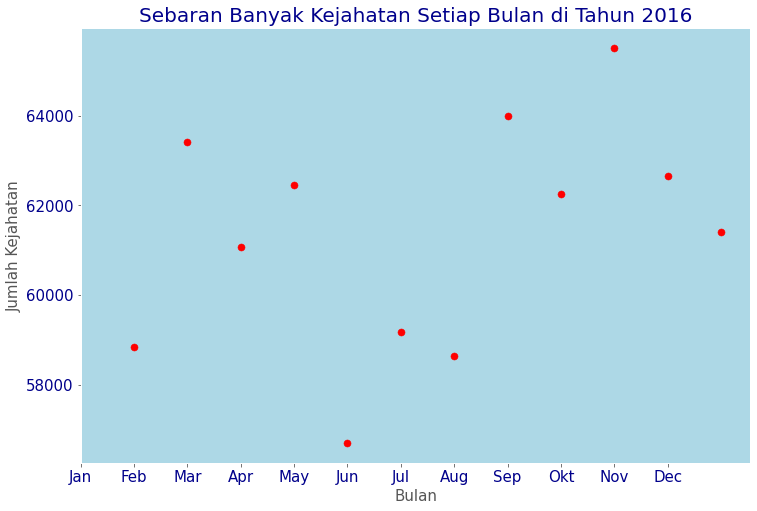

In [46]:
plt.figure(figsize=(12,8))
ax= plt.axes()
ax.set_facecolor('lightblue')
plt.scatter(x_range, total, s=50, c='red',cmap='varidis',alpha=1)
plt.title("Sebaran Banyak Kejahatan Setiap Bulan di Tahun 2016", color= 'darkblue', fontsize=20)
plt.xlabel("Bulan", fontsize=15)
plt.ylabel("Jumlah Kejahatan", fontsize=15)
plt.xticks(n, name_of_month)
plt.xticks(color='darkblue', fontsize=15)
plt.yticks(color='darkblue', fontsize=15)

plt.grid()

Pada Scatter Plot di atas, dapat diketahui sebaran banyak kejahatan setiap bulan di tahun 2016 yang ditandai dengan titik berwarna merah memiliki posisi yang berbeda sesuai dengan banyaknya kejahatan yang terjadi setiap bulannya di tahun 2016.

## 7. Line Plot
<p>Bagan Plot atau Line Plot adalah jenis plot yang menampilkan informasi sebagai rangkaian titik data yang disebut 'markers' yang dihubunngkan oleh segmen garis lurus. Line Plot adalah tipe bagan dasar yang umum di banyak bidang.</p>
<p><b>Pertanyaan : </b> Bagaimanakah sebaran jumlah kriminalitas per tahun dan sebaran kriminalitas per bulan dari tahun 2008 hingga 2016 di Kota London?</p>

### Sebaran Jumlah Kriminalitas di Kota London dari tahun 2008 hingga 2016

In [16]:
crimesPerYear, crimesPerMonth= {},{}
# months = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec']
months=['1','2','3','4','5','6','7','8','9','10','11','12']

for year in np.sort(df_lon['year'].unique()):
    crimesY=df_lon.loc[(df_lon['year']==year)]
    crimesPerYear[year]=sum(crimesY['value'])
    crimesPerMonth[year]=[]
    
    for month in months:
        crimesM= crimesY.loc[crimesY['month']==month]
        crimesPerMonth[year].append(sum(crimesM['value']))
        
valSort= list(crimesPerYear.values())
valSort.sort()
cpmMatrix = np.mean([crimesPerMonth[key] for key in crimesPerYear.keys()], axis=0)

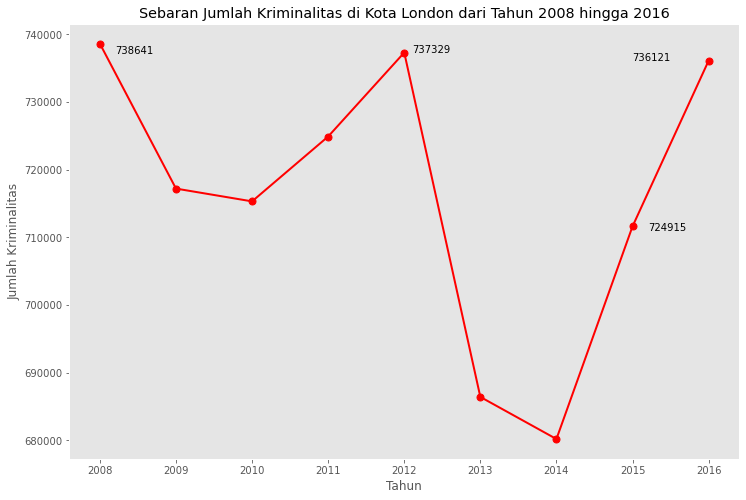

In [18]:
plt.figure(figsize=(12,8))
plt.plot(range(len(crimesPerYear.keys())), list(crimesPerYear.values()),
        linewidth= 2, color='red', marker='o', markersize=7.0)
plt.annotate(valSort[-1], (0.2, valSort[-1] - 1500))
plt.annotate(valSort[-2], (4.1, valSort[-2]))
plt.annotate(valSort[-3], (7., valSort[-3]))
plt.annotate(valSort[-4], (7.2, valSort[-7]-700))

plt.xticks(range(len(crimesPerYear.keys())), crimesPerYear.keys())
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kriminalitas')
plt.title('Sebaran Jumlah Kriminalitas di Kota London dari Tahun 2008 hingga 2016')
plt.grid()

### Sebaran Jumlah Kriminalitas di Kota London per Bulan dari tahun 2008 hingga 2016

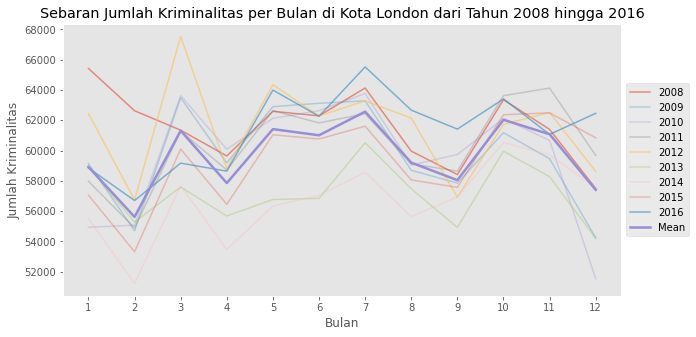

In [20]:
plt.figure(figsize=(10,5))

for year in crimesPerMonth.keys():
    if int(year) in [2008,2012,2016]:
        plt.plot(range(len(crimesPerMonth[year])), crimesPerMonth[year], label=year, alpha=0.6)
    else:
        plt.plot(range(len(crimesPerMonth[year])), crimesPerMonth[year], label=year, alpha=0.3)
plt.plot(range(12), cpmMatrix, label='Mean', linewidth=2.5)
plt.xticks(range(len(df_lon['month'].unique())), months)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Kriminalitas")
plt.title("Sebaran Jumlah Kriminalitas per Bulan di Kota London dari Tahun 2008 hingga 2016")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## 8. Word Clouds
<p>Word Clouds (juga dikenal sebagai text clouds atau tag clouds) bekerja dengan cara semakin banyak kata tertentu muncul dalam sumber data tekstual (seperti pidato, posting blog, atau database), semakin besar dan tebal kata itu muncul di kata cloud.</p>
<p><b>Pertanyaan :</b> Tampilkan semua kata dalam kolom Borough!</p>

In [10]:
kata_borough = df_lon['borough']

kata_borough

0              Croydon
1            Greenwich
2              Bromley
3            Redbridge
4           Wandsworth
               ...    
13490599         Brent
13490600    Hillingdon
13490601        Sutton
13490602       Croydon
13490603        Merton
Name: borough, Length: 13490604, dtype: object

In [11]:
kata_borough.to_csv("./data/crime_by_borough.txt", header=None, index=None, sep=' ', mode='a')

In [12]:
borough = open ("./data/crime_by_borough.txt", 'r').read()

In [16]:
stopwords = set(STOPWORDS)
borough_wd = WordCloud(
        background_color='white',
        stopwords=stopwords)
borough_wd.generate(borough);

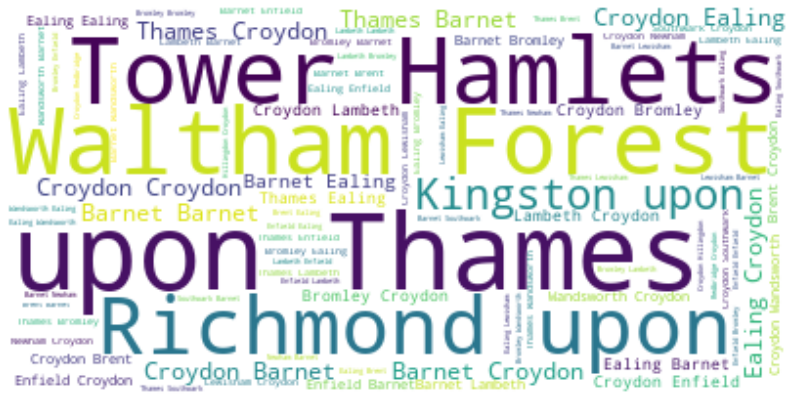

In [15]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(borough_wd, interpolation = 'bilinear')
plt.axis('off')

plt.show()

Pada Word Cloud di atas data dilihat bahwa Borough seperti Waltham, Tower Hamlets, Thames, dll tercetak dengan fontsize yang lebih besar daripada yang lain, sehingga dapat disimpulkan bahwa Borough-Borough tersebut banyak disebut atau dituliskan karna tingkat kejahatan yang beragam terjadi di Borough tersebut.